# **Plant Nutrition Regression**

## Introduction

Name : Muhamad Bagus Septian

Project description : This project is part of hacktiv8 talent fair chalenge. In this project there are problem proposed by ARIA product development data. In this dataset there are data about 8 different nutritional component. I assumed that this is a data about product development that ARIA have been worked on. So to solve that problem I'm going to build a machine learning regression model to explore the best nutrition component affecting growth rate.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import pickle

## Data Loading

In [2]:
df = pd.read_excel('aria_data.xlsx')

In [3]:
# Dataset preview
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [4]:
# Dataset preview
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [5]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


* Dataset consist of 10 columns and 160 rows
* There are no missing values in the dataset
* There are 9 numerical columns in the dataset which are v1 to v8 are classified nutritional value of the plant and target are data of plant growth
* There are one categorical column which is sample_type that indicates where the sample of the plant taken

## Exploratory Data Analysis

### Nutrition EDA

<AxesSubplot:xlabel='v8', ylabel='Count'>

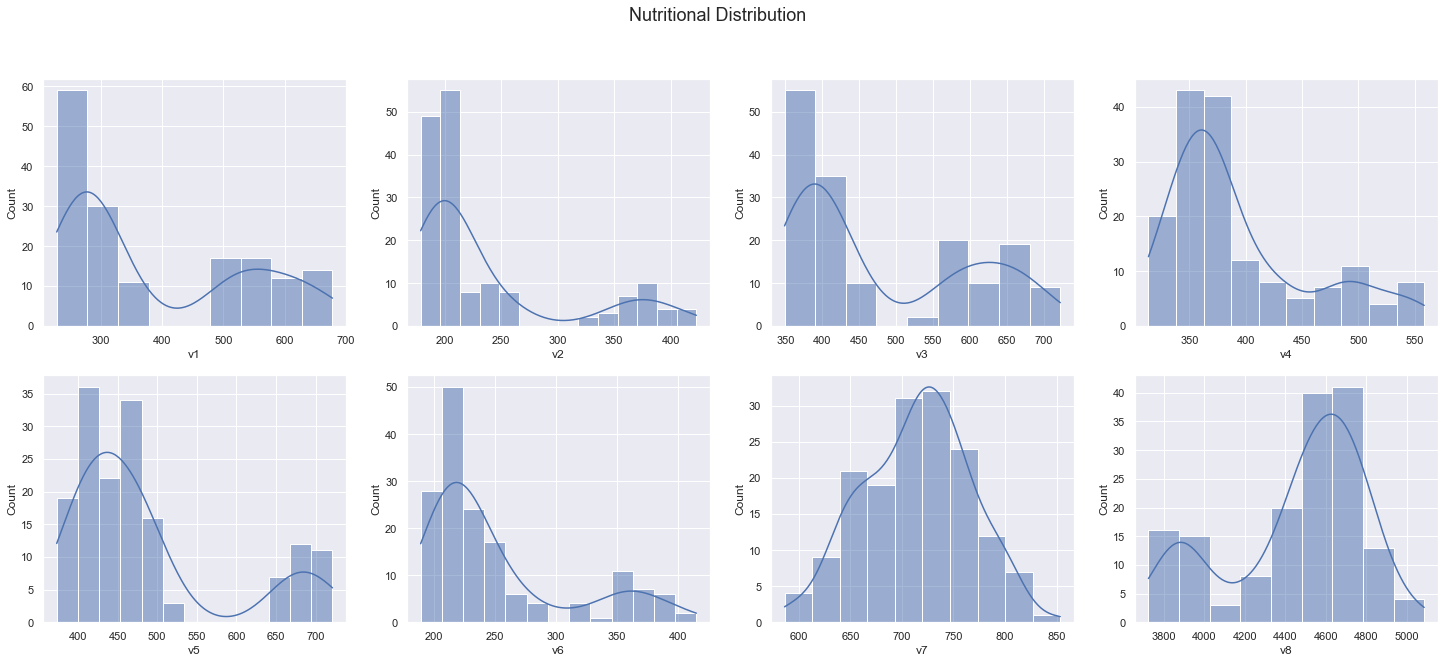

In [6]:
# Creating visualization to map the nutritional distribution using histogram
sns.set()
plt.figure(figsize=(25, 10))
plt.suptitle('Nutritional Distribution', fontsize=18)

# Histogram of v1
plt.subplot(2, 4, 1)
sns.histplot(data=df, x='v1', kde=True)

# Histogram of v2
plt.subplot(2, 4, 2)
sns.histplot(data=df, x='v2', kde=True)

# Histogram of v3
plt.subplot(2, 4, 3)
sns.histplot(data=df, x='v3', kde=True)

# Histogram of v4
plt.subplot(2, 4, 4)
sns.histplot(data=df, x='v4', kde=True)

# Histogram of v5
plt.subplot(2, 4, 5)
sns.histplot(data=df, x='v5', kde=True)

# Histogram of v6
plt.subplot(2, 4, 6)
sns.histplot(data=df, x='v6', kde=True)

# Histogram of v7
plt.subplot(2, 4, 7)
sns.histplot(data=df, x='v7', kde=True)

# Histogram of v8
plt.subplot(2, 4, 8)
sns.histplot(data=df, x='v8', kde=True)


In [7]:
# Checking for each nutrition skewness
nutrition = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
df[nutrition].skew()

v1    0.639911
v2    1.461728
v3    0.602655
v4    1.143693
v5    1.270640
v6    1.295483
v7   -0.107235
v8   -0.766444
dtype: float64

From the nutritional distribution we found that v1 through v6 are positive skew, which means most of the data have a low value. Meanwhile v7 have normal distribution which means the data have bell shaped distribution. Lastly we found that v8 have negative skew, which means most of the data have high value.

### Sample type EDA

Text(0.5, 1.0, 'Sample Type Proportion')

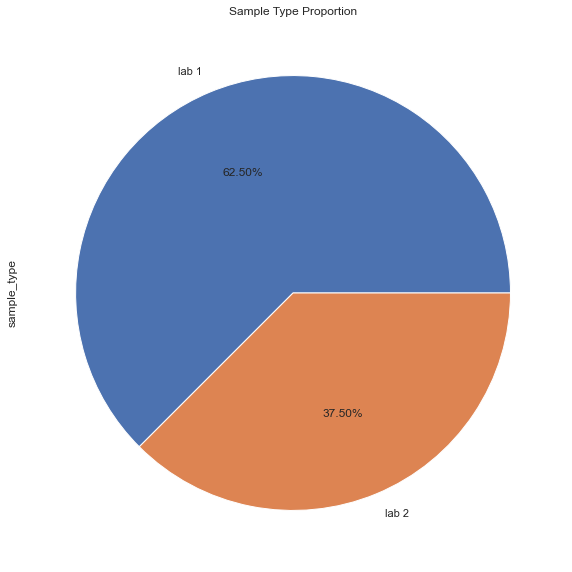

In [8]:
# Creating visualization for sample type proportion
df['sample_type'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')
plt.title('Sample Type Proportion')

Most of the samples are taken from lab 1 with 62.50% proportion. This is almost the double of proportion of samples from lab 2 which only have 37.50%

### Target EDA

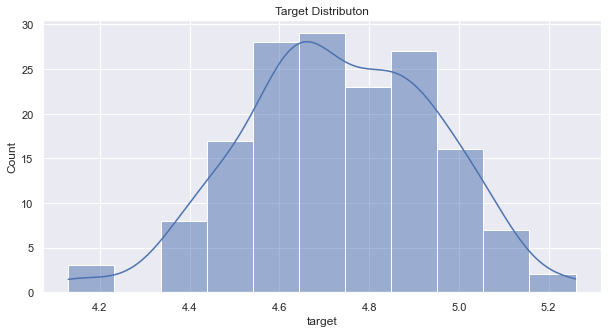

Skewness score -0.15828173643344287
Target mean 4.73


In [9]:
# Creating visualization for target distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='target', kde=True)
plt.title('Target Distributon')
plt.show()

# Checking for target skewness
print('Skewness score',df['target'].skew())

# Checking target mean
print('Target mean', np.round(df['target'].mean(), decimals=2))

We can see that target are distributed normally with most of the data value being close to overall mean which is 4.73

## Data Preprocessing

In [10]:
# Make copy of dataset for data preprocessing in case needed
data = df.copy()

### Handling Duplicate Data

In [11]:
# Checking for duplicate data
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type


There are no duplicate data found in the dataset

### Get Data for Model Inference

In [12]:
# We will take 10 data at random to be used in model inference
data_inf = data.sample(10, random_state=35)
data_inf 

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
49,4.55,280.562500,199.625000,381.687500,369.125000,431.125000,223.437500,757.812500,4722.562500,lab 1
124,5.01,551.631579,225.368421,627.789474,406.315789,499.421053,237.684211,727.105263,4670.210526,lab 2
145,4.54,635.562500,332.812500,651.437500,496.625000,669.750000,329.437500,721.562500,3947.125000,lab 2
80,4.45,290.733333,211.400000,386.400000,361.600000,421.666667,236.333333,725.000000,4557.866667,lab 1
87,4.62,360.666667,261.666667,452.400000,443.200000,490.600000,274.000000,787.333333,4784.666667,lab 1
89,4.80,327.812500,260.125000,450.000000,439.875000,494.375000,283.937500,789.812500,4508.875000,lab 1
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
7,4.74,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1
10,4.69,266.857143,189.142857,383.428571,324.285714,401.285714,196.714286,666.071429,4643.785714,lab 1
21,5.09,248.937500,182.187500,359.875000,315.625000,389.500000,199.562500,620.875000,4658.937500,lab 1


In [13]:
# Separating data inference from main dataset
data_train_test = data.drop(data_inf.index)

In [14]:
# Resetting index for both data inference and main dataset
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.55,280.562500,199.625000,381.687500,369.125000,431.125000,223.437500,757.812500,4722.562500,lab 1
1,5.01,551.631579,225.368421,627.789474,406.315789,499.421053,237.684211,727.105263,4670.210526,lab 2
2,4.54,635.562500,332.812500,651.437500,496.625000,669.750000,329.437500,721.562500,3947.125000,lab 2
3,4.45,290.733333,211.400000,386.400000,361.600000,421.666667,236.333333,725.000000,4557.866667,lab 1
4,4.62,360.666667,261.666667,452.400000,443.200000,490.600000,274.000000,787.333333,4784.666667,lab 1
5,4.80,327.812500,260.125000,450.000000,439.875000,494.375000,283.937500,789.812500,4508.875000,lab 1
6,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
7,4.74,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1
8,4.69,266.857143,189.142857,383.428571,324.285714,401.285714,196.714286,666.071429,4643.785714,lab 1
9,5.09,248.937500,182.187500,359.875000,315.625000,389.500000,199.562500,620.875000,4658.937500,lab 1


### Splitting data feature and target

In [15]:
# Split the target column as target data from the rest of the dataset
X = data_train_test.drop('target', axis=1)
y = data_train_test['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [16]:
# Splitting data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (120, 9)
Test Size  :  (30, 9)


### Handling Outliers

In [17]:
# Defining a fuction for boxplot and histogram to detect outliers
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

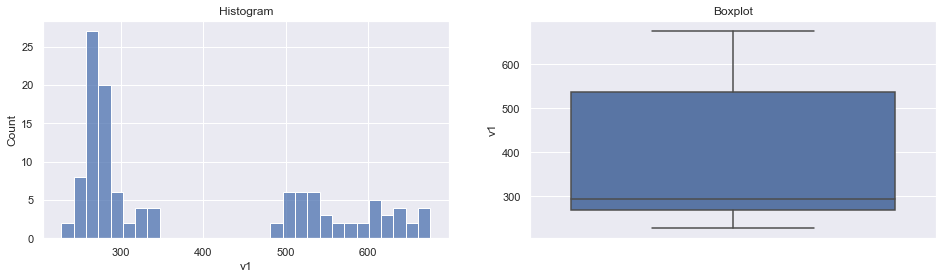

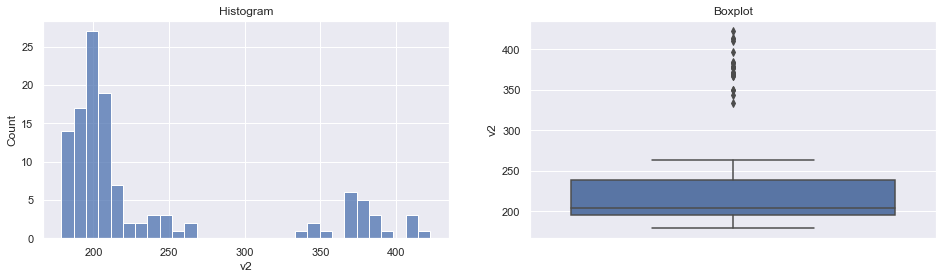

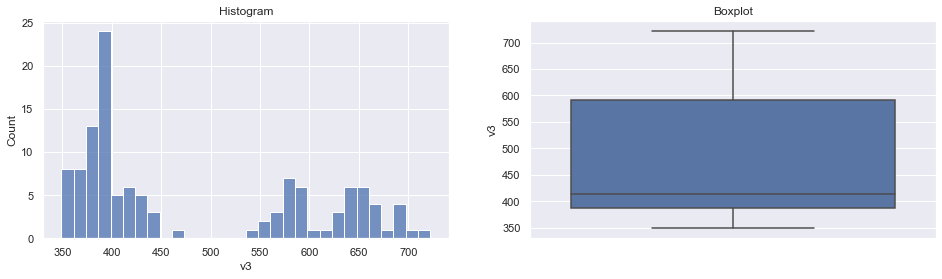

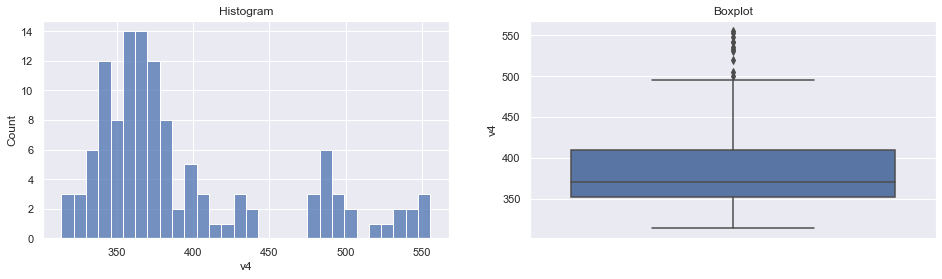

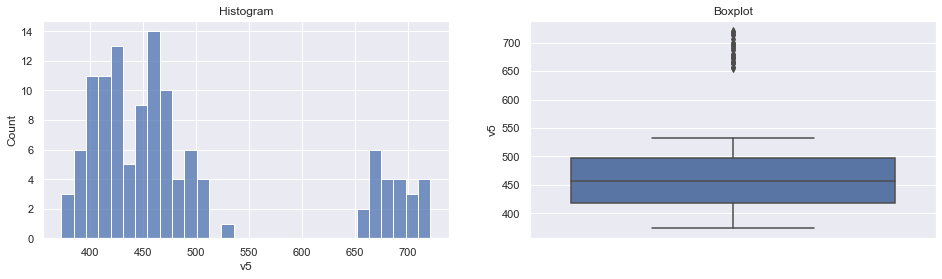

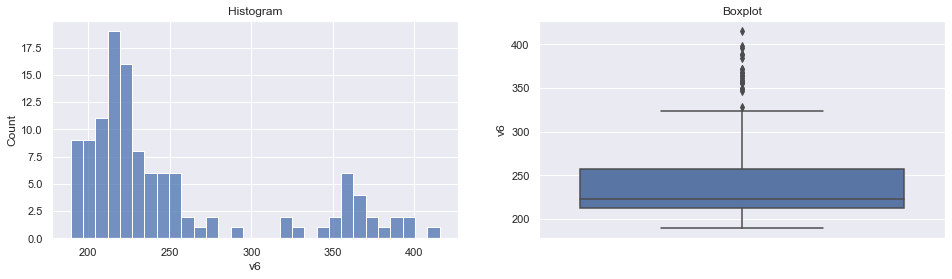

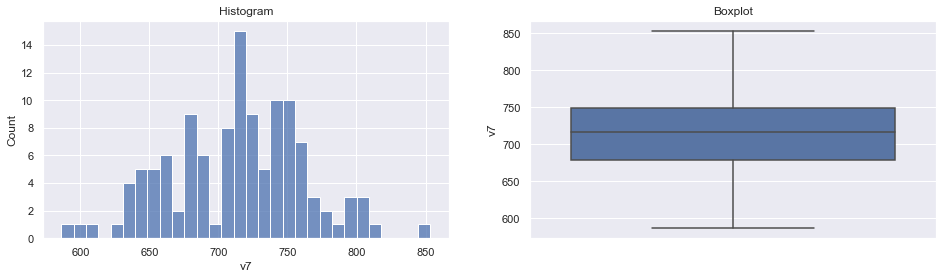

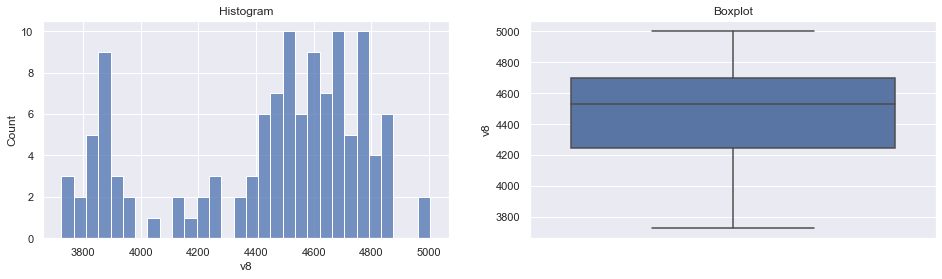

In [18]:
# Cheking outliers
diagnostic_plots(X_train, 'v1')
diagnostic_plots(X_train, 'v2')
diagnostic_plots(X_train, 'v3')
diagnostic_plots(X_train, 'v4')
diagnostic_plots(X_train, 'v5')
diagnostic_plots(X_train, 'v6')
diagnostic_plots(X_train, 'v7')
diagnostic_plots(X_train, 'v8')

There are outliers found in columns v2, v4, v5 and v6. These columns are all distributed as skewed positive, with that as consideration we will use capping method with iqr to handle the outliers. The amount of fold that will be used is 3 since some of the data have extreme outlier.

In [19]:
# We will use capping method with iqr to handle the outlier
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['v2', 'v4', 'v5', 'v6'])

winsorizer.fit(X_train)

X_train_cap = winsorizer.transform(X_train)

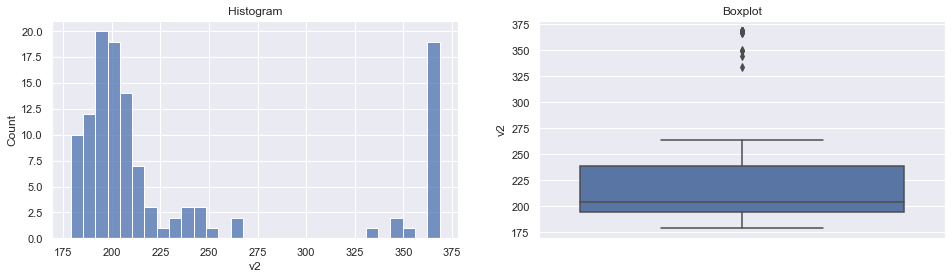

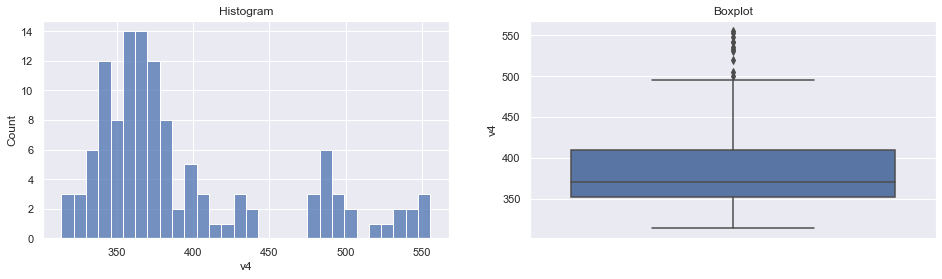

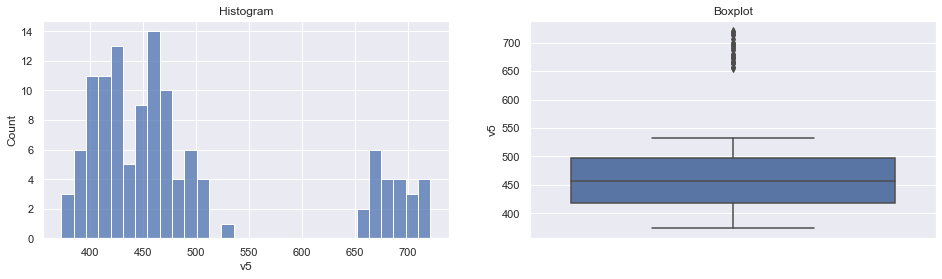

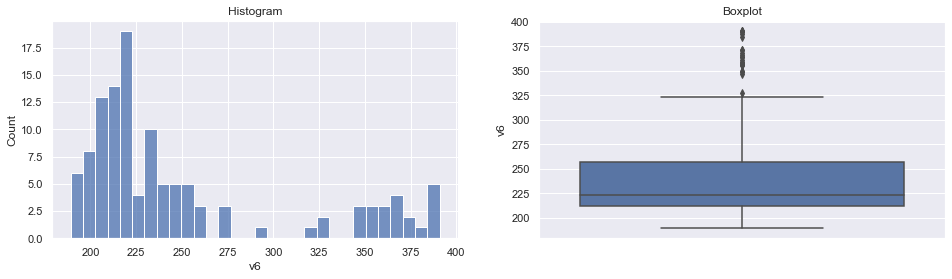

In [20]:
# We will check the capping result
diagnostic_plots(X_train_cap, 'v2')
diagnostic_plots(X_train_cap, 'v4')
diagnostic_plots(X_train_cap, 'v5')
diagnostic_plots(X_train_cap, 'v6')

### Feature Selection

In [21]:
X_train_num = X_train_cap[nutrition]
X_test_num = X_test[nutrition]

X_train_cat = X_train['sample_type']
X_test_cat = X_test['sample_type']

In [22]:
X_train_cat = X_train_cat.array.reshape(-1, 1)
X_test_cat = X_test_cat.array.reshape(-1, 1)

#### Numerical Feature Selection

Feature that will be used to train the data will be selected based on the strength of the correlation between each feature variable with target variable. The threshold of correlation coeeficient that will be included must be < - 0.2 and  > 0.2

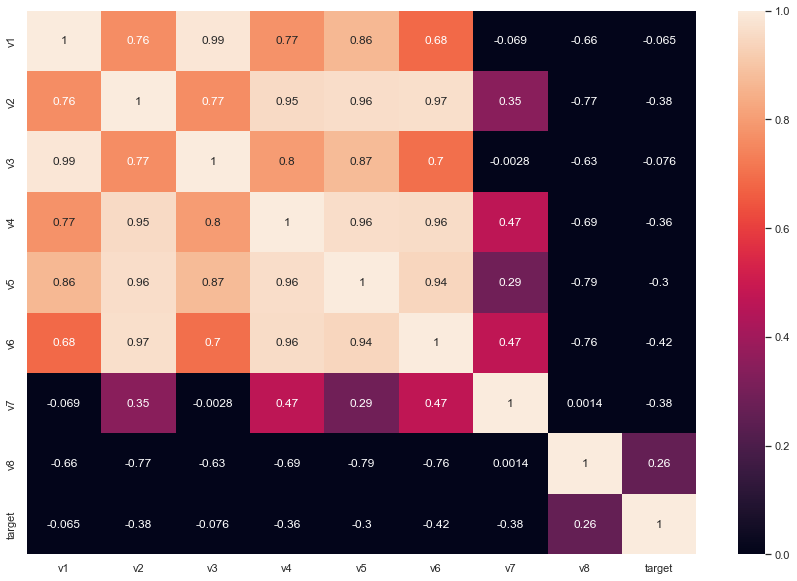

In [23]:
# We will invetigate the feature varaible correlation with target variable using heatmap
mat_corr = pd.concat([X_train_cap, y_train], axis=1)
corr = mat_corr.corr()


plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

There are 6 feature that match the criteria which are v2, v4, v5, v6 v7, and v8

In [24]:
num_cols = ['v2','v4','v5','v6', 'v7', 'v8']

#### Categorical Feature Selection

In [25]:
label = LabelEncoder() 
X_train_cat_en = label.fit_transform(X_train_cat)

C:\Users\Lled\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
cat_select = X_train_cat_en.reshape(-1, 1)

In [27]:
f_test = SelectKBest(score_func=f_regression, k=1)
anova = f_test.fit(cat_select, y_train)
np.round(anova.scores_, decimals=2)

array([0.28])

### Feature Scaling

Most of the numerical variable have skewed distribution. In that case for feature scalling we will be using the MinMaxScaler.

In [28]:
# Feature scaling using MinMaxScaler
scaler = RobustScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)
X_train_final

array([[-9.75837190e-02, -2.84316807e-01, -1.62219891e-01,
        -2.95019434e-01, -6.73986306e-01, -1.21326616e-01,
        -2.42600824e-02,  4.89917159e-01],
       [-1.07374728e-01, -3.95787656e-01, -1.22561872e-01,
         1.97305071e-01, -3.86353910e-01, -1.46935348e-02,
         5.46981612e-01,  6.11563679e-01],
       [ 8.23206244e-01, -1.81479672e-01,  7.22274106e-01,
        -4.82076765e-01,  6.89258586e-02, -4.30310663e-01,
        -1.52267693e+00, -6.88504781e-01],
       [-1.61691513e-01, -4.87880612e-01, -2.87549008e-01,
        -6.53545986e-01, -9.43217075e-01, -5.15673104e-01,
        -8.06945043e-01, -7.49171824e-01],
       [-8.03328943e-02, -2.99377842e-01, -9.35363575e-02,
        -2.25955442e-01, -1.82545202e-01,  1.50433809e-01,
         4.50654814e-01,  1.75858156e-01],
       [ 1.14191134e+00,  3.79588081e+00,  1.21413946e+00,
         1.94988505e+00,  2.66596234e+00,  2.96459558e+00,
        -1.40684693e-01, -1.44745850e+00],
       [-1.02012985e-01, -4.447120

### Feature Encoding

The encoding method that are going to be used for this project will be OneHotEncoder because the categorical data

In [29]:
#encoder = OneHotEncoder(sparse=False)

#encoder.fit(X_train_cat)

#X_train_encoded = encoder.transform(X_train_cat)
#X_test_encoded = encoder.transform(X_test_cat)
#X_train_encoded

### Concatenating Data Feature

In [30]:
#X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
#X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)
#X_train_final

## Model Definition

In [31]:
lin_model = LinearRegression()
svm_model = SVR()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

## Model Training

In [32]:
lin_model.fit(X_train_final, y_train)

LinearRegression()

In [33]:
svm_model.fit(X_train_final, y_train)

SVR()

In [34]:
rf_model.fit(X_train_final, y_train)

RandomForestRegressor()

In [35]:
gb_model.fit(X_train_final, y_train)

GradientBoostingRegressor()

## Model Evaluation

The model evaluation will be done with 2 step. Fisrt with cross validation to search the best model. Second with Grid Search to search for the best parameter. The metric used would be MAE, because there are outliers found in the dataset and MAE are robust against it.

### Cross Validation

In [36]:
cv_lin = cross_val_score(lin_model, X_train_final, y_train, cv=5, scoring='neg_mean_absolute_error')

In [37]:
cv_svm = cross_val_score(svm_model, X_train_final, y_train, cv=5, scoring='neg_mean_absolute_error')

In [38]:
cv_rf = cross_val_score(rf_model, X_train_final, y_train, cv=5, scoring='neg_mean_absolute_error')

In [39]:
cv_gb = cross_val_score(gb_model, X_train_final, y_train, cv=5, scoring='neg_mean_absolute_error')

In [40]:
cv_table = {'lin' : cv_lin, 'svm' : cv_svm, 'rf' : cv_rf, 'gb' : cv_gb}
cv_df = pd.DataFrame(cv_table)
cv_df

,lin,svm,rf,gb
0,-0.125614,-0.131506,-0.162183,-0.170739
1,-0.144063,-0.131666,-0.113971,-0.112397
2,-0.119204,-0.122776,-0.129063,-0.147209
3,-0.211672,-0.198232,-0.196379,-0.205549
4,-0.132132,-0.131331,-0.174683,-0.188789


Text(0.5, 1.0, 'Cross validation std across model')

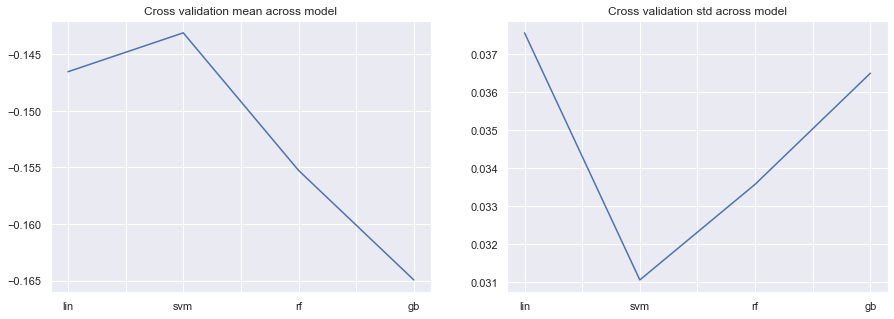

In [41]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
cv_df.mean().plot(kind='line')
plt.title('Cross validation mean across model')

plt.subplot(1, 2, 2)
cv_df.std().plot(kind='line')
plt.title('Cross validation std across model')

The model that are going to be chosen are the model with the best bias and variance. From the visualization we can see that SVM has the best MAE mean and the best std. Therefore we are going to use SVM model for this project.

### Model Improvement

In [42]:
y_pred_train_svm = svm_model.predict(X_train_final)
y_pred_test_svm = svm_model.predict(X_test_final)

In [66]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train_svm))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test_svm))


MAE train =  0.12665560055751515
MAE test =  0.19326678987459953


THe MAE score for the model are close to zero, but considering the mean of target which is 4.7 it's still really close. So we will explore more how to reduce the error in model prediction with hyperparameter tuning using grid search method.

In [47]:
# Defining parameter for rid search
param_grid = [{'kernel': ['rbf'],
               'C': [0.1, 0.5, 1, 5, 10, 50, 100],
               'gamma': [ 0.1, 0.5, 1, 5, 10, 50, 100]},
              {'kernel': ['linear'],
               'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1]},
              {'kernel': ['poly'],
               'degree': [2,3,4,5],
               'epsilon': [0.1, 0.5, 1, 5, 10, 50, 100],
               'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
              {'kernel' : ['sigmoid'],
               'gamma' : [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1],
               'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1]}]

In [58]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error')

In [59]:
grid_search.fit(X_train_final, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.2, 'kernel': 'linear'}
Best cross-validation score: -0.14


In [60]:
svm_model_imp = SVR(C=0.2, kernel='linear')

In [61]:
svm_model_imp.fit(X_train_final, y_train)

SVR(C=0.2, kernel='linear')

In [62]:
y_pred_train = svm_model_imp.predict(X_train_final)
y_pred_test = svm_model_imp.predict(X_test_final)

In [63]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))
print(' ')
print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))
print(' ')
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(' ')
print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  0.13855097277310138
MAE test =  0.17266664652165237
 
MSE train =  0.029753565045755055
MSE test =  0.04674718992221953
 
RMSE train =  0.17249221734836345
RMSE test =  0.21621098473995148
 
r2score train =  0.2731563953913846
r2score test =  0.21856480442055026


We can see iimporvement on the model predition error for data train from 0.19 to 0.17, but there are increase in error for data train prediction from 0.12 to 0.13. We can conclude that the model improvement work because it made our model able to be generalizaed more proven by the diminishing error for the data test. 

## Conclusion

* Most of the nutrient component which are v1 through v6 are administered in small amount. The analysis with pearson correlation from heatmap shows that these nutrient component have negative correlation with target growth.
* Meanwhile v7 also have normal distribution but also have negative correlation with target growth. It might be good to reduce this component to promote target groth.
* V8 has negative skew which means it's mostly administered to the target in large amount. This already good because the analysis with correlation shows positive correlation which means target growth will increase with addition of this nutrient.
* Suggestion for future improvement might be by reducing the nutrient with negative correlation with target growth and also adding more nutrient that are corelated more positively with target growth.